In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_excel('Case_Study.xlsx',sheet_name="Feedback")
df_o = pd.read_excel('Case_Study.xlsx',sheet_name="Operation")

In [20]:
df

,Complaint Category,Percentage
0,Slow Boarding Process,0.35
1,Unsatisfactory Cabin Service,0.25
2,Flight Delays,0.20
3,Seat Comfort,0.15
4,Food Quality,0.05


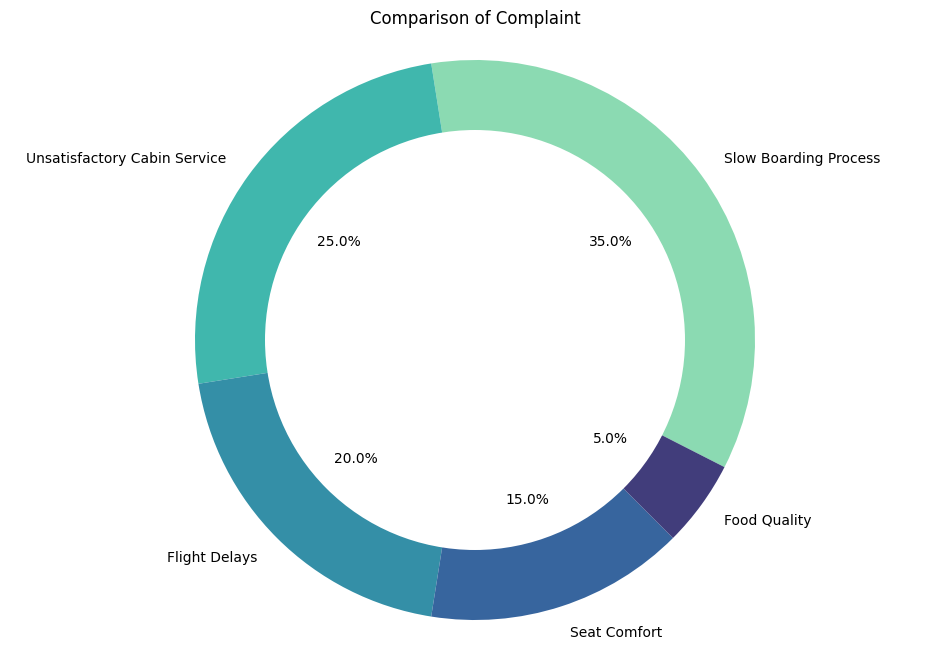

In [26]:
plt.figure(figsize=(12,8))

plt.pie(df['Percentage'], labels=df['Complaint Category'], startangle=333, autopct='%1.1f%%', colors=sns.color_palette('mako_r'))
plt.axis('equal')
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Comparison of Complaint');

In [30]:
df_o

,Flight Revenue,Revenue per Flight,Operating Cost,Net Revenue
0,Jakarta - Sydney,50000,30000,20000
1,Jakarta- Singapore,15000,10000,5000
2,Jakarta - Bali,5000,3500,1500
3,Jakarta - Tokyo,40000,25000,15000
4,Jakarta - New York,70000,55000,15000


In [63]:
df_o.to_csv("case_route.csv")

In [34]:
df_o2 = df_o[['Flight Revenue','Revenue per Flight','Operating Cost']]

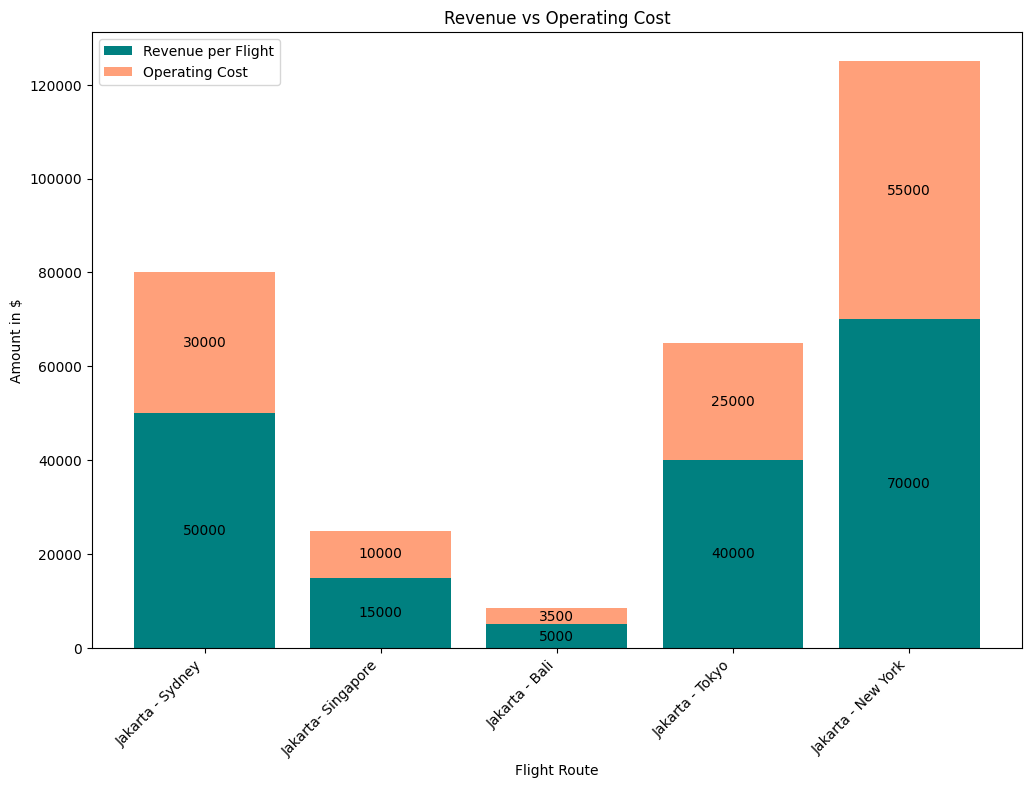

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['teal', 'lightsalmon']
ax.bar(df_o2['Flight Revenue'], df_o2['Revenue per Flight'], label='Revenue per Flight',color=colors[0])
ax.bar(df_o2['Flight Revenue'], df_o2['Operating Cost'], bottom=df_o2['Revenue per Flight'], label='Operating Cost',color=colors[1])

ax.set_xlabel('Flight Route')
ax.set_ylabel('Amount in $')
ax.set_title('Revenue vs Operating Cost')
ax.legend()

plt.xticks(rotation=45, ha='right')

for i in range(len(df_o2)):
    ax.text(i, df_o2['Revenue per Flight'][i] / 2, str(df_o2['Revenue per Flight'][i]), ha='center', va='center', color='black')
    ax.text(i, df_o2['Revenue per Flight'][i] + df_o2['Operating Cost'][i] / 2, str(df_o2['Operating Cost'][i]), ha='center', va='center', color='black')


plt.show()

''

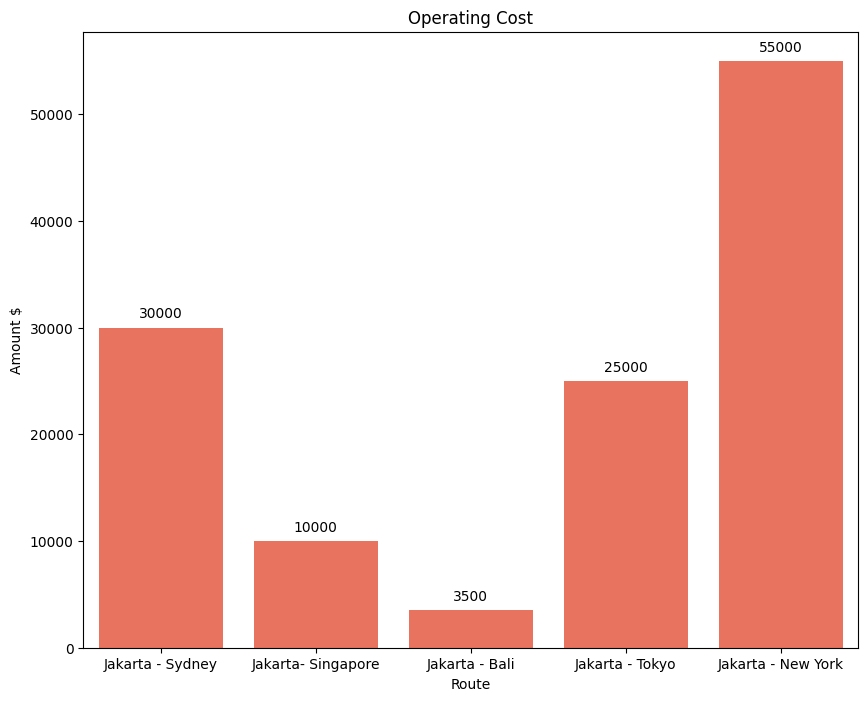

In [62]:
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Flight Revenue', y='Operating Cost', data=df_o,color="Tomato")
plt.title('Operating Cost')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.xlabel('Route')
plt.ylabel('Amount $')
# plt.legend(title='Oper',loc='lower left')
;